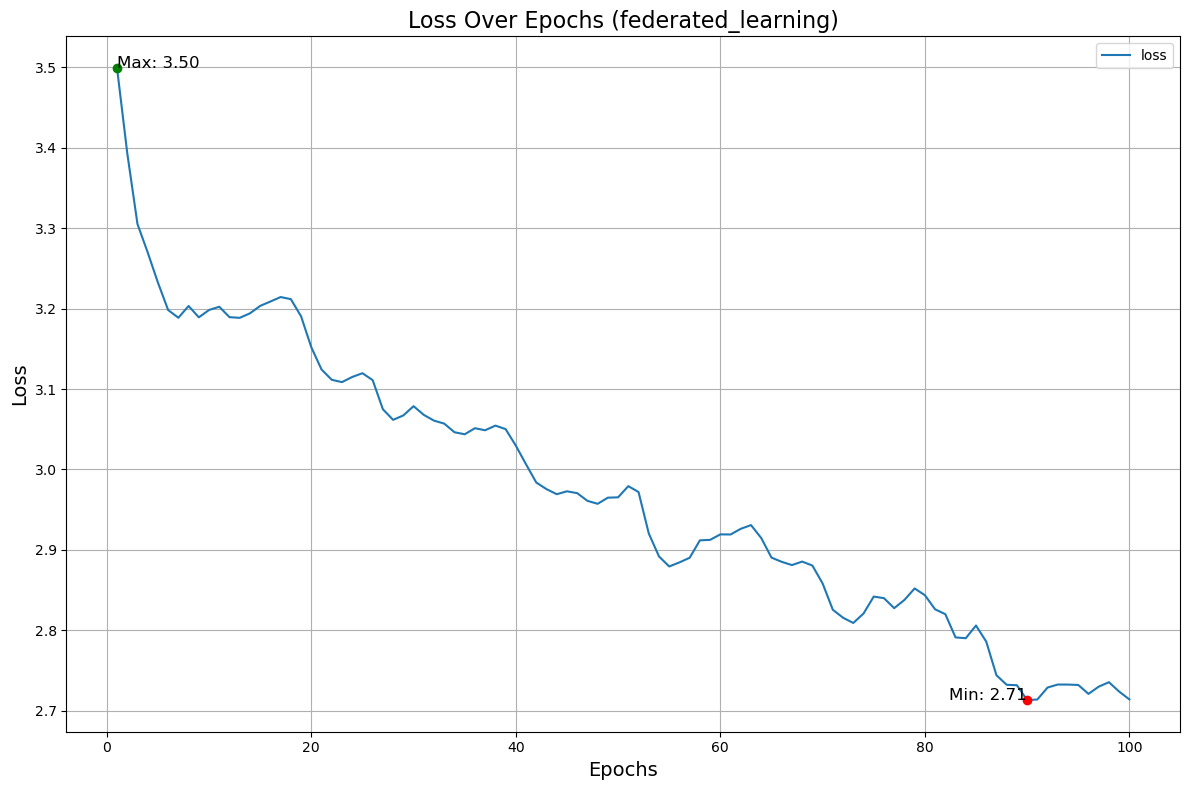

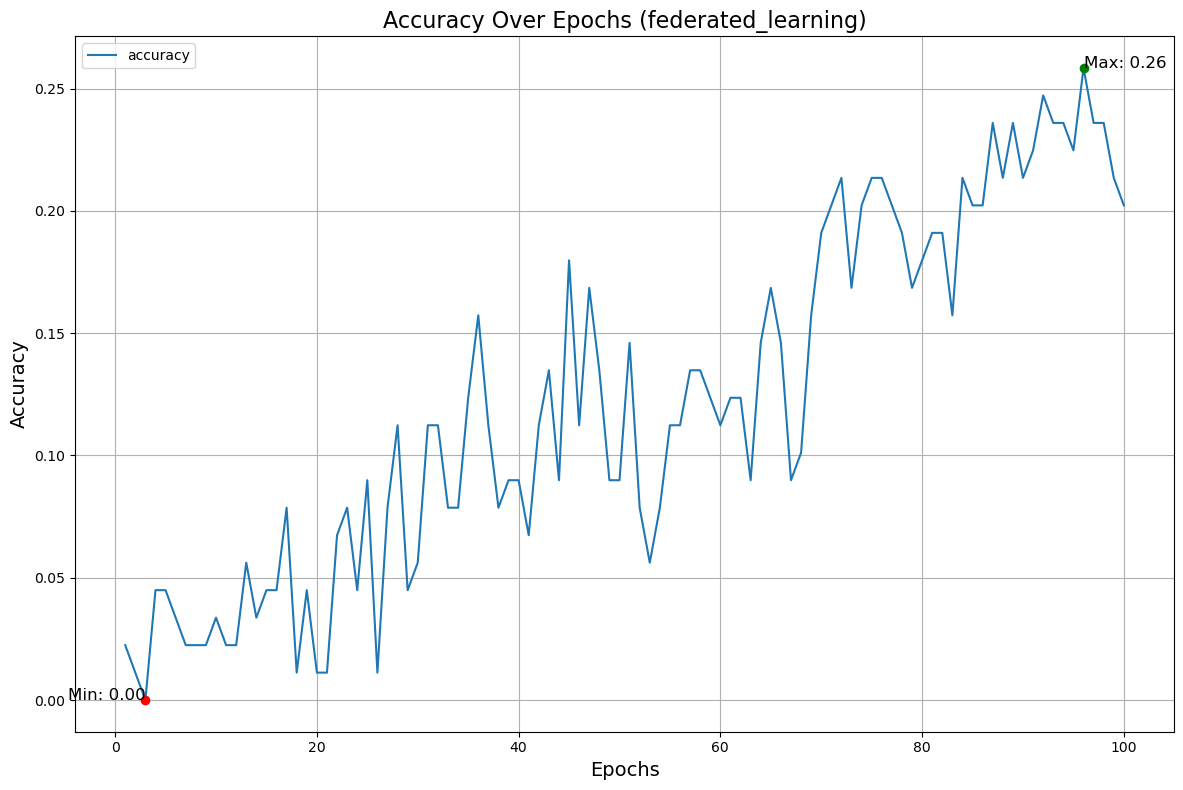

In [2]:
import json
import matplotlib.pyplot as plt
import os

def plot_metrics(data, metric_name, file_name, show_extrema=False):
    epochs = range(1, len(data[metric_name]) + 1)
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(epochs, data[metric_name], label=metric_name)
    
    if show_extrema:
        min_val = min(data[metric_name])
        max_val = max(data[metric_name])
        min_epoch = data[metric_name].index(min_val) + 1
        max_epoch = data[metric_name].index(max_val) + 1
        
        ax.plot(min_epoch, min_val, 'ro')
        ax.text(min_epoch, min_val, f'Min: {min_val:.2f}', fontsize=12, ha='right')
        
        ax.plot(max_epoch, max_val, 'go')
        ax.text(max_epoch, max_val, f'Max: {max_val:.2f}', fontsize=12, ha='left')

    ax.set_xlabel('Epochs', fontsize=14)
    ax.set_ylabel(metric_name.capitalize(), fontsize=14)
    ax.set_title(f'{metric_name.capitalize()} Over Epochs ({file_name})', fontsize=16)
    ax.legend()

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Load the results from the JSON file
result_path = "results/federated_learning.json"
# result_path = "results/virus_share_177.json"
file_name = os.path.basename(result_path).split('.')[0]
with open(result_path, 'r') as file:
    results = json.load(file)

plot_metrics(results, 'loss', file_name, show_extrema=True)
plot_metrics(results, 'accuracy', file_name, show_extrema=True)
